In [21]:
import pandas as pd
import seaborn as sns
import re
# import nltk
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

In [22]:
df = pd.read_csv('IMDB-Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

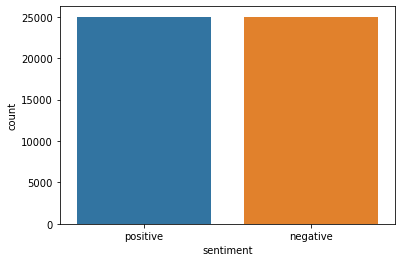

In [23]:
sns.countplot(x='sentiment', data=df)

In [24]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [25]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [26]:

def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text) 
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [27]:
# import nltk
# nltk.download('punkt')

df['review'] = df['review'].apply(data_processing)

In [28]:
X = df['review']
Y = df['sentiment']

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [31]:
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]

In [32]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [33]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [34]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [35]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5)


Epoch 1/5
2000/2000 [==============================] - 22s 11ms/step - loss: 0.6837 - accuracy: 0.6860
Epoch 2/5
2000/2000 [==============================] - 23s 12ms/step - loss: 0.6352 - accuracy: 0.9225
Epoch 3/5
2000/2000 [==============================] - 19s 9ms/step - loss: 0.5806 - accuracy: 0.9595
Epoch 4/5
2000/2000 [==============================] - 18s 9ms/step - loss: 0.5203 - accuracy: 0.9780
Epoch 5/5
2000/2000 [==============================] - 16s 8ms/step - loss: 0.4541 - accuracy: 0.9895


In [36]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                1661456   
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 1,661,601
Trainable params: 1,661,601
Non-trainable params: 0
_________________________________________________________________


In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

500/500 [==============================] - 5s 11ms/step
Test loss: 0.5539446263313293
Test accuracy: 0.8379999995231628


In [38]:
pred=model.predict(x_test)

In [39]:
binary_predictions = [1 if p > 0.5 else 0 for p in pred]


In [40]:
for i in range(5):
    if binary_predictions[i] == 1:
        print(f"Sample {i + 1}: Positive")
    else:
        print(f"Sample {i + 1}: Negative")

Sample 1: Negative
Sample 2: Negative
Sample 3: Negative
Sample 4: Positive
Sample 5: Negative


In [1]:
sampleInput="Salman khan tiger 3 movie is bad to watch you should must watch it."

NameError: name 'preprocess' is not defined

In [ ]:
sampleInput=preprocessing(sampleInput)
scaledInput=vect.transform([sampleInput])


In [ ]:
pred=model.predict(scaledInput.toarray())
sentiment = "positive" if pred > 0.5 else "negative"
sentiment
# pred